In [1]:
% matplotlib inline

(1) COLUMN HEADERS:  ['Premature death Value', 'Poor or fair health Value', 'Poor physical health days Value', 'Poor mental health days Value', 'Low birthweight Value', 'Adult smoking Value', 'Adult obesity Value', 'Food environment index Value', 'Physical inactivity Value', 'Access to exercise opportunities Value', 'Excessive drinking Value', 'Alcohol-impaired driving deaths Value', 'Sexually transmitted infections Value', 'Teen births Value', 'Uninsured Value', 'Primary care physicians Value', 'Dentists Value', 'Mental health providers Value', 'Preventable hospital stays Value', 'Diabetic screening Value', 'Mammography screening Value', 'High school graduation Value', 'Some college Value', 'Unemployment Value', 'Children in poverty Value', 'Income inequality Value', 'Children in single-parent households Value', 'Social associations Value', 'Violent crime Value', 'Injury deaths Value', 'Air pollution - particulate matter Value', 'Drinking water violations Value', 'Severe housing probl

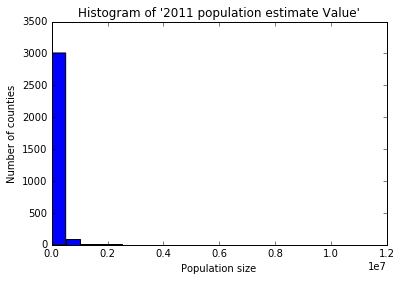

10.2716296201


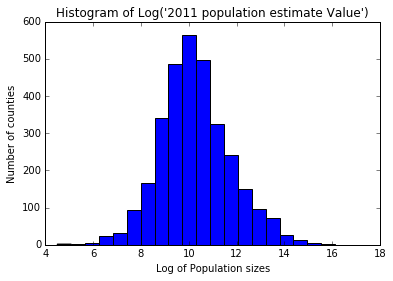

3013
79
Normal distribution 0.00089500260438 0.0632489215451 0.117405843388
Kernel Density Estimation 0.000927332063472 0.0709712761574 0.116439769644
{'Alcohol-impaired driving deaths Value': (0.31602053256336154, 0.1594826909673947), 'Income inequality Value': (4.484664438077043, 0.7118939890837294), 'Injury deaths Value': (77.25592715231788, 24.95293286430732), 'Population that is not proficient in English Value': (0.01816555237185625, 0.029496668886560683), 'Dentists Value': (41.63484798953907, 26.77669157388627), 'Long commute - driving alone Value': (0.29846959567016834, 0.12062380898905323), 'Access to exercise opportunities Value': (0.6249024936061368, 0.22963246120777892), 'Primary care physicians Value': (55.40572951365756, 34.38495551006253), 'Infant mortality Value': (7.506831395348824, 2.3855619936128196), 'Health care costs Value': (9426.968102073366, 1609.7753384665527), 'Physical inactivity Value': (0.2699703915950339, 0.05320499427738718), 'Some college Value': (0.5573

"x = numpy.linspace(0,1,10000)\np = pdf_ptc(x)\nplt.plot(x, p)\nplt.title(r'PDF $Cx^3$')\nplt.xlabel('Random variable X')\nplt.ylabel('Probability density function')\nplt.show()"

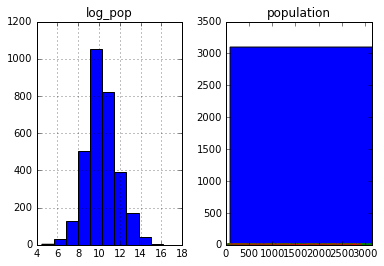

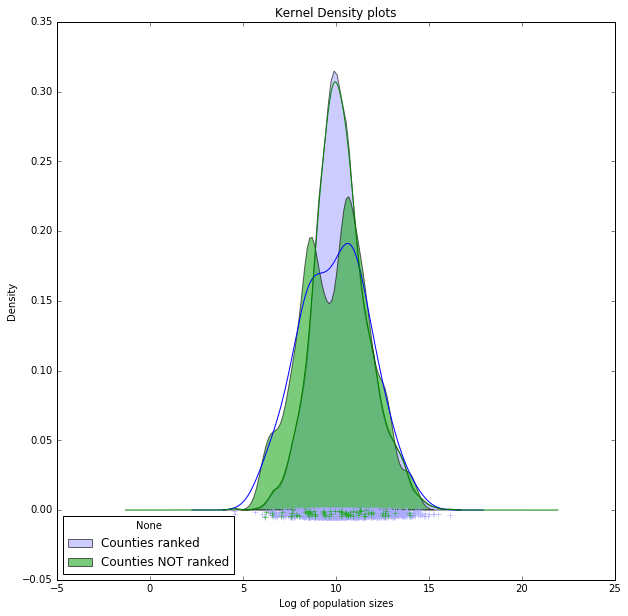

In [3]:
# %load a1_110479710.py


# In[32]:

#get_ipython().magic(u'matplotlib inline')
import pandas as pd
import numpy
import sys
import matplotlib.pyplot as plt
import scipy.stats as ss


# ## Get the file name from the command line

# In[4]:

'''if(len(sys.argv) != 2):
    return -1
else:'''
#input_csv = sys.argv[1]


# In[40]:

county_health_records = pd.read_csv('2015_CHR_Analytic_Data.csv',low_memory=False)
#county_health_records = pd.read_csv(input_csv,low_memory=False)
#print len(county_health_records)
county_health_records = county_health_records[county_health_records['COUNTYCODE'] != 0]
#print len(county_health_records)
# county_health_records = pd.read_csv(input_csv,low_memory=False)


# In[6]:

column_headers = county_health_records.columns


# In[7]:

column_headers_value = list()
for c in column_headers:
    if c.endswith("Value"):
        column_headers_value.append(c)


# In[8]:

len(column_headers_value)


# In[9]:

print '(1) COLUMN HEADERS: ', column_headers_value


# ## A. (1) All column headers ending in “Value”
# ### 55 in total
# (1) COLUMN HEADERS:  ['Premature death Value', 'Poor or fair health Value', 'Poor physical health days Value', 'Poor mental health days Value', 'Low birthweight Value', 'Adult smoking Value', 'Adult obesity Value', 'Food environment index Value', 'Physical inactivity Value', 'Access to exercise opportunities Value', 'Excessive drinking Value', 'Alcohol-impaired driving deaths Value', 'Sexually transmitted infections Value', 'Teen births Value', 'Uninsured Value', 'Primary care physicians Value', 'Dentists Value', 'Mental health providers Value', 'Preventable hospital stays Value', 'Diabetic screening Value', 'Mammography screening Value', 'High school graduation Value', 'Some college Value', 'Unemployment Value', 'Children in poverty Value', 'Income inequality Value', 'Children in single-parent households Value', 'Social associations Value', 'Violent crime Value', 'Injury deaths Value', 'Air pollution - particulate matter Value', 'Drinking water violations Value', 'Severe housing problems Value', 'Driving alone to work Value', 'Long commute - driving alone Value', '2011 population estimate Value', 'Population that is not proficient in English Value', 'Population living in a rural area Value', 'Diabetes Value', 'HIV prevalence rate Value', 'Premature age-adjusted mortality Value', 'Infant mortality Value', 'Child mortality Value', 'Food insecurity Value', 'Limited access to healthy foods Value', 'Motor vehicle crash deaths Value', 'Drug poisoning deaths Value', 'Uninsured adults Value', 'Uninsured children Value', 'Health care costs Value', 'Could not see doctor due to cost Value', 'Other primary care providers Value', 'Median household income Value', 'Children eligible for free lunch Value', 'Homicide rate Value']

# In[10]:

print len(county_health_records['County'].unique())


# ## (2) The total number of counties in the file.
# 1875

# In[11]:

#print 'Not ranked', county_health_records['County that was not ranked'].sum()
print 'Ranked', len(county_health_records[county_health_records['County that was not ranked'] != 1])
#print 'Total counties', len(county_health_records)


# ## (3) The total number of counties without a “1” in the field “County that was not ranked”
# 3062

# ## B. (4) A histogram of the field “2011 population value”. Choose an appropriate number of bins

# In[12]:

population_estimate = county_health_records['2011 population estimate Value']
#population_estimate = population_estimate.set_index(['County'])
#len(population_estimate)


# In[13]:

population_estimate = [p.replace(',','') for p in population_estimate]
population_estimate = pd.to_numeric(population_estimate)
len(population_estimate)


# In[14]:

'''population = list()
for p in population_estimate:
    population.append(p.replace(',',''))
population = pd.to_numeric(population)'''


# In[15]:

population_estimate = pd.DataFrame(population_estimate)
population_estimate['population'] = pd.DataFrame(population_estimate)


# In[16]:

del population_estimate[0]
population_estimate.head()


# In[17]:

'''#population = population.T
print type(population)
print population'''


# In[18]:

plot, bins = numpy.histogram(population_estimate, bins = 20)
print plot


# In[19]:

plt.hist(population_estimate['population'],bins = 20)
#plt.hist(plot)
plt.ylabel('Number of counties')
plt.xlabel('Population size')
plt.title("Histogram of '2011 population estimate Value'")
plt.show()


# ## B. (5) HISTOGRAM OF LOG POPULATION

# In[20]:

population_estimate['log_pop'] = numpy.log(population_estimate['population'])
print population_estimate['log_pop'].mean()
plt.hist(population_estimate['log_pop'],bins = 20)
plt.ylabel('Number of counties')
plt.xlabel('Log of Population sizes')
plt.title("Histogram of Log('2011 population estimate Value')")
plt.show()


# In[21]:

#pop_pd = pd.Series(population)


# In[22]:

'''print pop_pd.describe()
import scipy.stats
print scipy.stats.describe(population)'''


# In[23]:

'''pop_pd.hist(bins=10)'''


# In[24]:

'''pop_pd.plot(logy = True, bins=10, kind='hist')'''


# In[25]:

'''county_health_records['log_pop'] = numpy.log(pop_pd)
county_health_records['log_pop'].mean()'''


# In[26]:

population_estimate.hist(bins = 10)


# ## B. (6) KERNEL DENSITY ESTIMATES

# In[27]:

county_health_records['log_pop'] = population_estimate['log_pop']
pop_log_ranked = county_health_records[county_health_records['County that was not ranked'] != 1]['log_pop']
pop_log_no_rank = county_health_records[county_health_records['County that was not ranked'] == 1]['log_pop']
pop_log_ranked = pop_log_ranked.dropna()
print len(pop_log_ranked)
print len(pop_log_no_rank)


# In[28]:

#import KDE
from sklearn.neighbors import KernelDensity
def kde_plot(kernel, X, label, color="#aaaaff", bw = 1):
    #create the estimator:
    kde_X = KernelDensity(kernel=kernel, bandwidth=bw).fit(X)
    #setup range:
    range = numpy.linspace(X.min()-bw*3, X.max()+bw*3, 80)[:,numpy.newaxis]
    #print range
    #plot:
    plt.fill(range[:,0], numpy.exp(kde_X.score_samples(range)), fc=color, alpha=.6,label= label)
    dots = [y-numpy.random.rand()*.005 for y in numpy.zeros(X.shape[0])] #all points, randomly jittered on the y axis
    plt.plot(X[:,0], dots, '+k', color=color)
    plt.legend(loc ='upper right')
    return kde_X


# In[29]:

pop_log_ranked.plot()
pop_log_no_rank.plot()


# In[30]:

pop_log_ranked_reshape = pop_log_ranked.reshape(-1,1)
pop_log_no_rank_reshape = pop_log_no_rank.reshape(-1,1)

#print pop_log_ranked_reshape
#print pop_log_no_rank_reshape
plt.figure(figsize=(10,10))
plt.title('Kernel Density plots')
plt.xlabel('Log of population sizes')
plt.ylabel('Probability density estimate')

# Using Scott's Rule for BW estimation
d = 1
n = len(pop_log_ranked_reshape)
kde_ranked = kde_plot('gaussian', pop_log_ranked_reshape, 'Counties ranked','#aaaaff',n**(-1./(d+4)))
n = len(pop_log_no_rank_reshape)
kde_no_rank = kde_plot('gaussian', pop_log_no_rank_reshape, 'Counties NOT ranked','#22aa22', n**(-1./(d+4)))

#kde_plot('tophat', pop_reshape, '#22aa22',0.1)
#kde_plot('epanechnikov',pop_log_ranked_reshape,'Counties ranked Epanechnikov','#ffbbbb',0.1)
#kde_plot('linear',pop_reshape,'#ccbbbb',0.1)


# ## B. (7) PROBABILITY RANKED GIVEN POP
# ###   300 - 0.000927332063472
# ### 3100 - 0.0709712761574 
# ### 5000 - 0.116439769644
# 

# In[33]:

#print kde_no_rank.score(numpy.log(300))
norm_ranked = ss.norm(pop_log_ranked_reshape.mean(),pop_log_ranked_reshape.std())
print 'Normal distribution', norm_ranked.cdf(numpy.log(300)), norm_ranked.cdf(numpy.log(3100)),norm_ranked.cdf(numpy.log(5100))
p_300 = numpy.exp(kde_ranked.score(numpy.log(300)))
#print kde_no_rank.score(numpy.log(3100))
p_3100 = numpy.exp(kde_ranked.score(numpy.log(3100)))
#print kde_no_rank.score(numpy.log(5000))
p_5000 = numpy.exp(kde_ranked.score(numpy.log(5000)))
print 'Kernel Density Estimation', p_300, p_3100, p_5000


# In[34]:

pop_log_no_rank.plot(kind='kde')
pop_log_ranked.plot(kind='kde')


# ## C (8). LIST MEAN AND STD_DEV PER COLUMN
# 
# {'Alcohol-impaired driving deaths Value': (0.31602053256336154, 0.1594826909673947), 'Income inequality Value': (4.484664438077043, 0.7118939890837294), 'Injury deaths Value': (77.25592715231788, 24.95293286430732), 'Population that is not proficient in English Value': (0.01816555237185625, 0.029496668886560683), 'Dentists Value': (41.63484798953907, 26.77669157388627), 'Long commute - driving alone Value': (0.29846959567016834, 0.12062380898905323), 'Access to exercise opportunities Value': (0.6249024936061368, 0.22963246120777892), 'Primary care physicians Value': (55.40572951365756, 34.38495551006253), 'Infant mortality Value': (7.506831395348824, 2.3855619936128196), 'Health care costs Value': (9426.968102073366, 1609.7753384665527), 'Physical inactivity Value': (0.2699703915950339, 0.05320499427738718), 'Some college Value': (0.5573731295765683, 0.11636523148864716), 'Could not see doctor due to cost Value': (0.15360813076278282, 0.05570687962009395), 'Adult smoking Value': (0.21280892659535178, 0.06313990505475427), 'Food insecurity Value': (0.14738363578478117, 0.03860826748397867), 'Drinking water violations Value': (0.091823872851119, 0.17082047431770433), '2011 population estimate Value': (100645.92136262337, 322424.28175318893), 'Uninsured children Value': (0.08294777070063704, 0.03796197622443093), 'Poor mental health days Value': (3.5633449208188455, 1.031267626983575), 'Low birthweight Value': (0.08206771860618123, 0.021218194760026367), 'Food environment index Value': (7.070105062082143, 1.259496773603016), 'Poor or fair health Value': (0.17259467347683305, 0.061201344989731295), 'Children in single-parent households Value': (0.321241719745223, 0.1038134055471681), 'Median household income Value': (46002.60095541401, 11656.714552958785), 'Air pollution - particulate matter Value': (11.623918918918912, 1.526818560649685), 'Poor physical health days Value': (3.8234770217313923, 1.145274910314228), 'Preventable hospital stays Value': (69.96361324857789, 27.85571495068757), 'Driving alone to work Value': (0.7864743712193578, 0.07757335379337814), 'Drug poisoning deaths Value': (14.196911344137266, 7.7579946361904435), 'Severe housing problems Value': (0.14337917860553936, 0.04837390002133522), 'Social associations Value': (13.888278255332718, 7.099423947044871), 'High school graduation Value': (0.8304816616766458, 0.09444980502267583), 'Adult obesity Value': (0.30692486469277336, 0.04340914176249675), 'Excessive drinking Value': (0.1650678651685395, 0.05166149833515888), 'Uninsured Value': (0.1757789808917195, 0.05382483303641701), 'Other primary care providers Value': (59.67927578402845, 48.75694079882451), 'Uninsured adults Value': (0.2133308917197451, 0.06570153973471007), 'Homicide rate Value': (6.347850770478507, 4.785794456003632), 'Population living in a rural area Value': (0.5862422795288122, 0.3150483456102307), 'Diabetic screening Value': (0.8425396311873155, 0.06494698832846958), 'Children eligible for free lunch Value': (0.4336744673419488, 0.17251698647723795), 'Sexually transmitted infections Value': (367.2541737073337, 269.6253766009784), 'Diabetes Value': (0.10980452085323186, 0.023136220643614744), 'Children in poverty Value': (0.24581401273885364, 0.0956436477438821), 'HIV prevalence rate Value': (174.65475678002642, 229.16407973633864), 'Premature death Value': (7999.362120706903, 2419.731941081509), 'Premature age-adjusted mortality Value': (387.99778645833356, 100.7687870740297), 'Unemployment Value': (0.07256082802547757, 0.02649990762483159), 'Child mortality Value': (63.26838677354706, 26.104858488305197), 'Mammography screening Value': (0.6073458005249365, 0.08177315297920842), 'Teen births Value': (43.38898026315784, 19.668152331535808), 'Limited access to healthy foods Value': (0.08376504297994246, 0.08208571448699543), 'Violent crime Value': (248.7400437121724, 196.56298399253401), 'Motor vehicle crash deaths Value': (20.546203130688056, 10.085016636591387), 'Mental health providers Value': (123.98692117355957, 130.18282014370004)}

# In[35]:

dict_std_mean = {}
#v = column_headers_value[0]
for v in column_headers_value:
    temp = county_health_records[v]
    temp = [float(str (p).replace(',','')) for p in temp]
    temp_df = pd.Series(temp)
    dict_std_mean[v] = (temp_df.mean(),temp_df.std())
print dict_std_mean


# ## C (9). PSEUDO-POP-DEPENDENT COLUMNS

# In[36]:

log_pop = county_health_records['log_pop']
meanB = log_pop.mean()
A_less_meanB = county_health_records[county_health_records['log_pop'] < meanB]
A_greater_meanB = county_health_records[county_health_records['log_pop'] > meanB]
#print meanB
#print len(A), len(B), len(county_health_records)


# In[38]:

dependent_pop_col = []
for v in column_headers_value:
    tempA = county_health_records[v]
    tempA = [float(str (p).replace(',','')) for p in tempA]
    temp_dfA = pd.Series(tempA)
    
    tempA_less_meanB = A_less_meanB[v]
    tempA_less_meanB = [float(str (p).replace(',','')) for p in tempA_less_meanB]
    temp_dfA_less = pd.Series(tempA_less_meanB)
    
    tempA_greater_meanB = A_greater_meanB[v]
    tempA_greater_meanB = [float(str (p).replace(',','')) for p in tempA_greater_meanB]
    temp_dfA_greater = pd.Series(tempA_greater_meanB)
    
    if (abs(temp_dfA_less.mean() - temp_dfA_greater.mean()) < (0.5*(temp_dfA.std()))):
        dependent_pop_col.append(v)


# In[39]:

print dependent_pop_col


# ## 3. Avoiding the death of your cell-mate

# In[ ]:

'''mean = 42 
SD = 12
x = numpy.linspace(mean-4*SD,mean+4*SD,1000)
norm = ss.norm(mean,SD)

plt.plot(x,norm.pdf(x))
plt.fill(x,norm.pdf(x))
plt.xlabel('Battery Life (hours)')
plt.ylabel('Probability density')
plt.title('Probability Density Function')'''


# In[ ]:

'''plt.plot(x,norm.cdf(x))
plt.xlabel('Battery Life (hours)')
plt.ylabel('Cumulative density')
plt.title('Cumulative Distribution Function')'''


# In[ ]:

'''norm.cdf(36)'''


# In[ ]:

'''norm.ppf(0.35853753872)'''


# In[ ]:

'''def pdf_ptc(x):
    return 4*(x**3)'''


# In[ ]:

'''x = numpy.linspace(0,1,10000)
p = pdf_ptc(x)
plt.plot(x, p)
plt.title(r'PDF $Cx^3$')
plt.xlabel('Random variable X')
plt.ylabel('Probability density function')
plt.show()'''


# In[ ]:



